In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import re
import os
import datetime as dt

In [ ]:
df=pd.read_excel(r'C:\project2\mini\data\2024_목차_이용안내_총괄표_최종_628.xlsx',sheet_name='1. 노인복지시설의 종류 및 현황',header=[2,3])

# 필요없는 열 삭제
df.drop(23,axis=0,inplace=True)
df.drop(24,axis=0,inplace=True)
df.drop(25,axis=0,inplace=True)

# 컬럼명 정리
df.columns=["_".join([str(i) for i in col if str(i) != 'nan' ]) for col in df.columns]
df=df.loc[:,~df.columns.str.contains('^Unnamed')]
df.columns=df.columns.str.replace('_Unnamed:.*',"",regex=True)

# 인덱스 정리
df.columns=df.columns.str.replace('\n','',regex=True)
df['종류']=df['종 류'].str.replace('\n','',regex=True)
df['시설']=df['시 설'].str.replace('\n','',regex=True) 
df=df.set_index(['종류','시설'])

# 필요없는 행 삭제
df.drop('종 류',axis=1,inplace=True)
df.drop('시 설',axis=1,inplace=True)

# 인덱스 정리
df=df.reset_index()
df['종류']=df['종류'].fillna(method='ffill')
df.set_index('종류',inplace=True)
df.drop(index='합 계',inplace=True)



C:\Users\user\AppData\Local\Temp\ipykernel_8472\2870039992.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['종류']=df['종류'].fillna(method='ffill')


Text(0, 0.5, '시설 수')

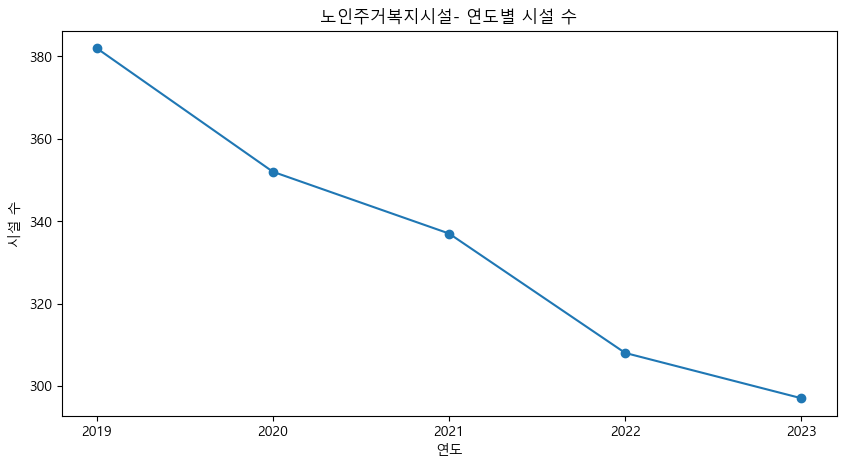

In [19]:
#노인주거복지시설- 연도별 시설 수
target_row=df[(df.index=='노인주거복지시설') & (df['시설']=='소 계')]
target_col=[col for col in target_row.columns if '시설 수' in col]

data=target_row[target_col].T
data.columns=['시설 수']

data.index=[col.split('_')[0]for col in data.index]
data=data.sort_index()

plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.plot(data.index,data['시설 수'],marker='o')
plt.title('노인주거복지시설- 연도별 시설 수')
plt.xlabel('연도')
plt.ylabel('시설 수')

Text(0, 0.5, '입소정원 수')

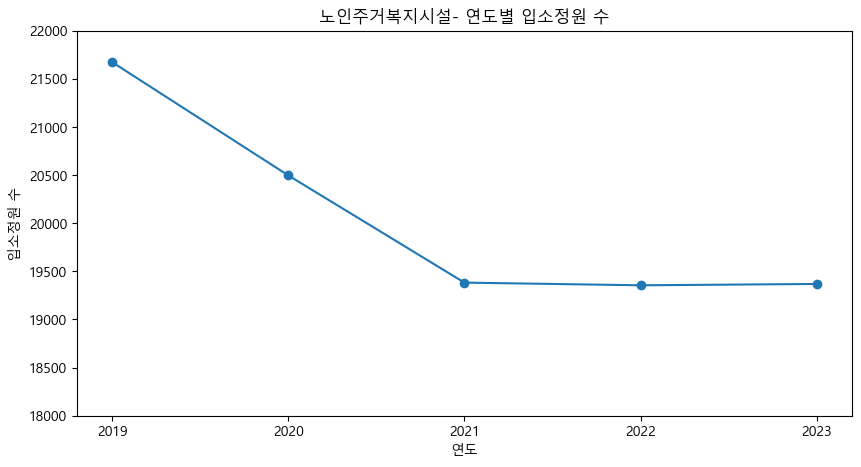

In [20]:
#노인주거복지시설- 연도별 입소정원 수
target_row=df[(df.index=='노인주거복지시설') & (df['시설']=='소 계')]
target_col=[col for col in target_row.columns if '입소정원' in col]

data=target_row[target_col].T
data.columns=['입소정원']

data.index=[col.split('_')[0]for col in data.index]
data=data.sort_index()


plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.plot(data.index,data['입소정원'],marker='o')
plt.title('노인주거복지시설- 연도별 입소정원 수')
plt.ylim(18000,22000)
plt.xlabel('연도')
plt.ylabel('입소정원 수')

Text(0, 0.5, '시설 수')

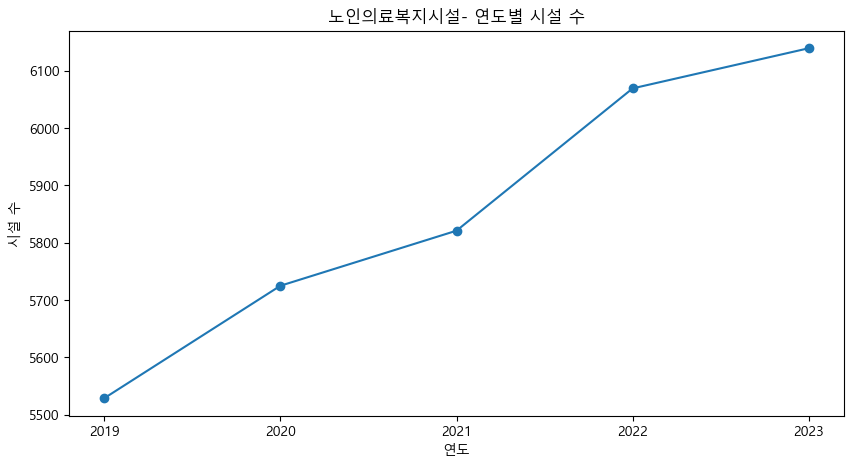

In [21]:
# 노인의료복지시설- 연도별 시설 수
target_row=df[(df.index=='노인의료복지시설') & (df['시설']=='소 계')]
target_col=[col for col in target_row.columns if '시설 수' in col]

data=target_row[target_col].T
data.columns=['시설 수']

data.index=[col.split('_')[0]for col in data.index]
data=data.sort_index()


plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.plot(data.index,data['시설 수'],marker='o')
plt.title('노인의료복지시설- 연도별 시설 수')
plt.xlabel('연도')
plt.ylabel('시설 수')

Text(0, 0.5, '입소정원 수')

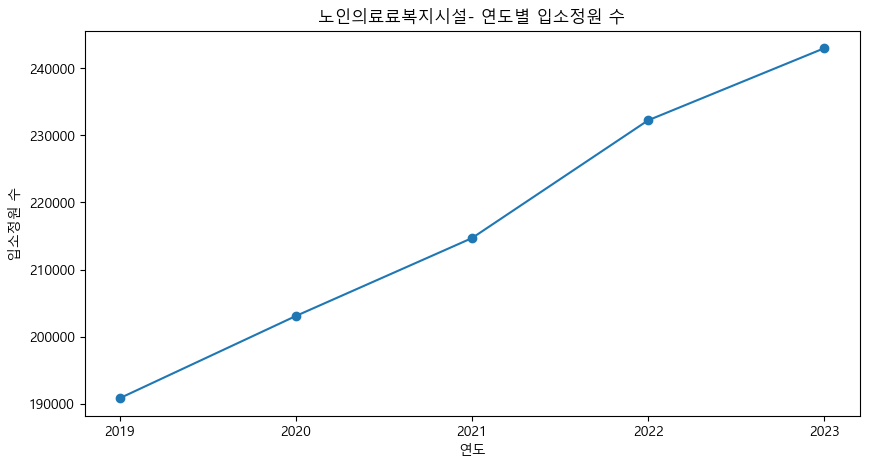

In [22]:
target_row=df[(df.index=='노인의료복지시설') & (df['시설']=='소 계')]
target_col=[col for col in target_row.columns if '입소정원' in col]

data=target_row[target_col].T
data.columns=['입소정원']

data.index=[col.split('_')[0]for col in data.index]
data=data.sort_index()


plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(10,5))
plt.plot(data.index,data['입소정원'],marker='o')
plt.title('노인의료료복지시설- 연도별 입소정원 수')
plt.xlabel('연도')
plt.ylabel('입소정원 수')